# Data Explorartion

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Train data shape: " , train.shape)
print("Test data shape: " ,test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Plot the data - as part of exploration

In [5]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
np.log(200000000)

19.113827924512311

In [8]:
np.exp(19.113827924512311)

200000000.0

In [9]:
#Skew is :
train.SalePrice.skew()

1.8828757597682129

In [10]:
plt.hist(train.SalePrice,color='green')

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

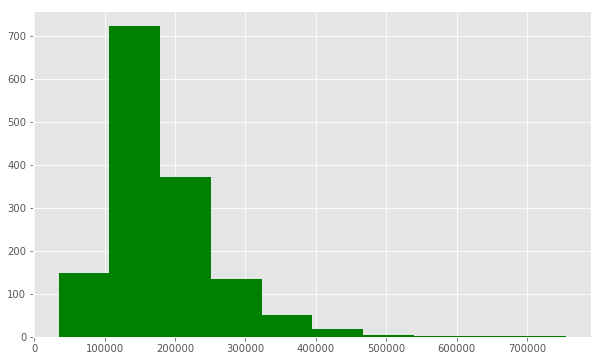

In [11]:
plt.show()

In [12]:
#Try log function to reduce skewness
#lets convert the saleprice to their log value

target = np.log(train.SalePrice)

In [13]:
target.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [14]:
#New skew is :
target.skew() 
# A value closer to 0 considered to be good

0.12133506220520406

In [15]:
plt.hist(target,color='green')

(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

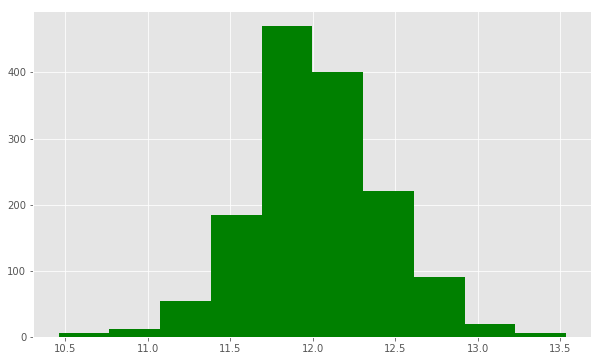

In [16]:
plt.show()

### Feature Engineering

In [17]:
#First, we’ll check out the numerical features and make some plots. 
#The .select_dtypes() method 
#will return a subset of columns matching the specified data types.

In [18]:
numeric_features = train.select_dtypes(include=[np.number])

In [19]:
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [20]:
#if you are curious for non-integer variables
train.select_dtypes(include=[np.object]).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [21]:
#The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between 
#the features and the target.
corr = numeric_features.corr()

In [22]:
type(corr)

pandas.core.frame.DataFrame

In [23]:
corr.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.022829,0.013228,0.165250,0.120411,0.260795,-0.025846,0.171217,0.177344,0.169392,0.132625,...,0.127875,0.140120,-0.027989,0.035447,0.056039,0.075679,0.024339,0.039160,0.013155,0.293053
std,0.164327,0.206872,0.217781,0.187661,0.283448,0.200596,0.299184,0.246353,0.214785,0.251963,...,0.184927,0.185041,0.196558,0.163405,0.167260,0.164106,0.164466,0.164511,0.168315,0.291845
min,-0.050298,-0.386347,-0.386347,-0.139781,-0.183882,-0.375983,-0.387268,-0.193919,-0.128101,-0.495251,...,-0.125989,-0.093079,-0.387268,-0.046635,-0.082864,-0.059689,-0.043080,-0.145721,-0.145721,-0.135907
25%,-0.018682,-0.055879,0.039197,0.007031,0.030935,-0.090699,-0.013391,0.007819,0.013491,-0.013051,...,0.002752,0.006882,-0.108229,-0.007664,-0.005747,0.009143,-0.020468,-0.006362,-0.028922,0.002612
50%,0.000392,-0.009860,0.112149,0.081223,0.245656,-0.039410,0.135533,0.123960,0.142710,0.089590,...,0.100123,0.118732,-0.026855,0.019609,0.042272,0.055623,-0.005018,0.021331,-0.013940,0.299982
75%,0.009940,0.038442,0.265772,0.178226,0.522412,0.025501,0.307277,0.275636,0.279719,0.238158,...,0.219864,0.223116,0.010304,0.034154,0.064170,0.080533,0.007060,0.036471,0.009883,0.518948
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#corr.head

In [25]:
#most corelated 5 variables
print(corr['SalePrice'].sort_values(ascending=False)[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


In [26]:
#Least corelated 5 variables

In [27]:
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [28]:
#Let’s dig deeper on OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [29]:
#If you want to see frequency distributions - Condition 5 is most common
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [30]:
# Create a Pivot table to see SalePrice and OverallQual relationship

quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',
                                 aggfunc=np.median)

In [31]:
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

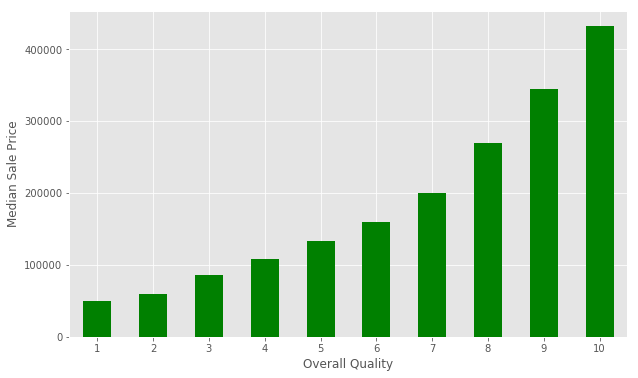

In [32]:
# We can see the above result in a bar chart
quality_pivot.plot(kind='bar', color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#Notice that the median sales price strictly increases as Overall Quality increases.

In [33]:
#scatter plot to visualize relationship betwwn GrLiveArea and Saleprice

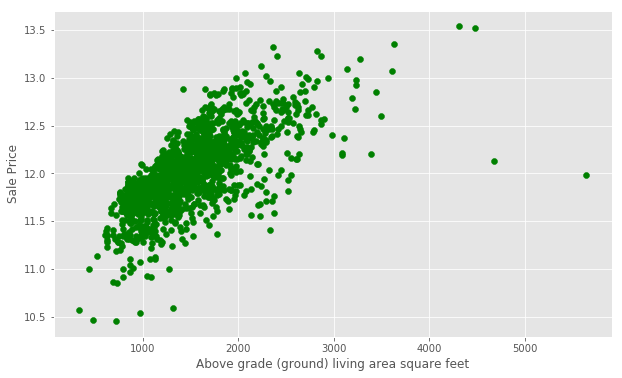

In [34]:
plt.scatter(x=train['GrLivArea'],y=target,color='green')
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

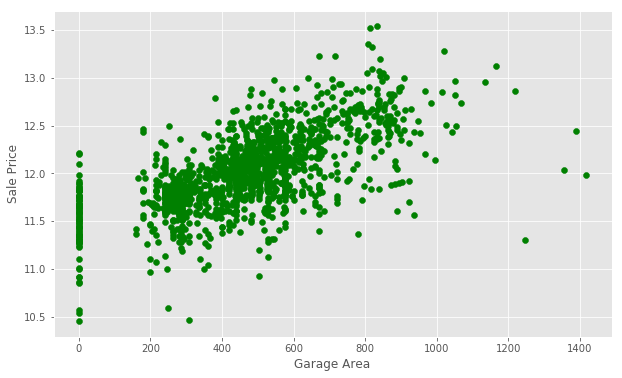

In [35]:
#lets see for GarageArea
plt.scatter(x=train['GarageArea'], y=target,color='green')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data. Removing outliers is an art and a science. There are many techniques for dealing with outliers.

In [36]:
train = train[train['GarageArea'] < 1200]

In [37]:
train.shape

(1455, 81)

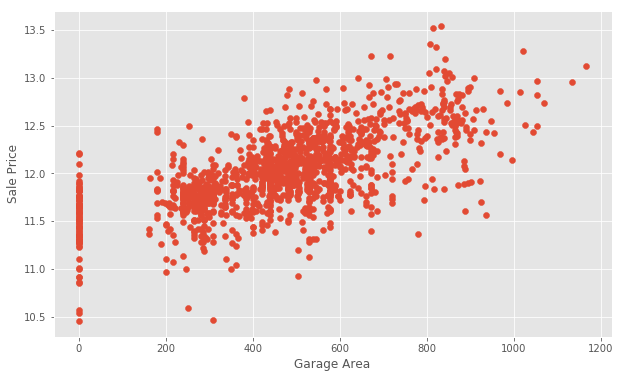

In [38]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
#plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [39]:
train.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1449
MiscFeature     1402
Alley           1364
Fence           1174
FireplaceQu      689
LotFrontage      258
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

In [40]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])

In [41]:
nulls.columns

RangeIndex(start=0, stop=1, step=1)

In [42]:
nulls.shape

(25, 1)

In [43]:
nulls.head

<bound method NDFrame.head of                  0
PoolQC        1449
MiscFeature   1402
Alley         1364
Fence         1174
FireplaceQu    689
LotFrontage    258
GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
Utilities        0
YearRemodAdd     0
MSSubClass       0
Foundation       0
ExterCond        0
ExterQual        0>

In [44]:
nulls.columns=['Null count']
nulls.index.name = 'Feature'
nulls

,Null count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [45]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


### Wrangling non-numeric features

In [46]:
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals = train.select_dtypes(include=[np.object])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


one-hot encoding to make use of the information for modeling. One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

In [47]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

In [48]:
# Same transformation needed for both train and test data
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [49]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


 Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

<class 'pandas.core.series.Series'>


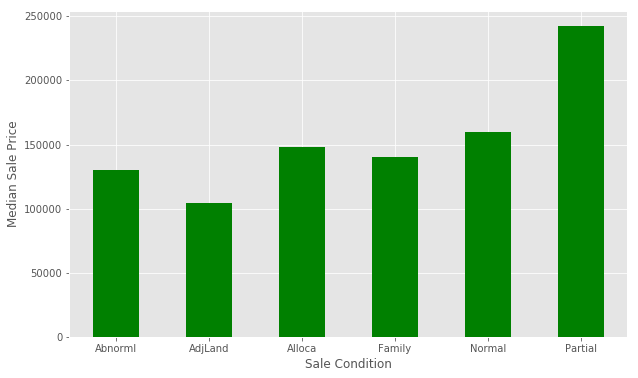

In [50]:
#SaleCondition relationship with SalePrice
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
print(type(condition_pivot))
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [51]:
#Median price is higher for partial compared to other categories and others also almost in same range.
# So partial can be converted to '1' and rest can be '0' for the purpose of feature engineering.

def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

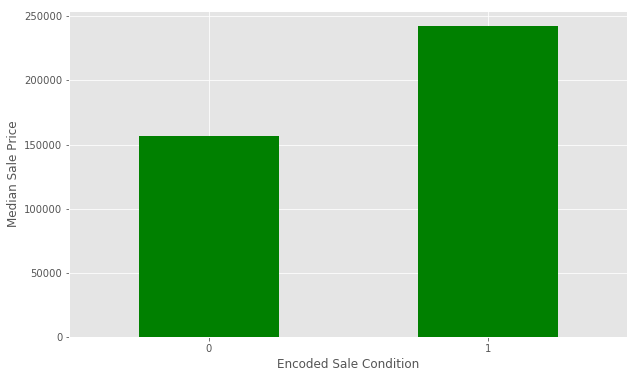

In [52]:
# If we plot this new feature :
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Before we prepare the data for modeling, we need to deal with the missing data. We’ll the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. 

Sometimes domain knowledge helps in treating the missing data .

In [53]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [54]:
# To check if all the columns now have 0 null value
sum(data.isnull().sum() != 0)

0

### Model Building from the above feature engineering - 
##### We will do more feature engineering later and see if we can improve the model performance

In [55]:
#Create target variable y and feature set X from the train data . We are dropping the SalePrice from 
# X and 'ID' is just a index with no influence to SalePrice

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [56]:
data.shape

(1455, 40)

In [57]:
X.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
enc_street         uint8
enc_condition      int64
dtype: object

Let’s partition the data and start modeling. We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

X_train is the subset of our features used for training.
X_test is the subset which will be our ‘hold-out’ set - what we’ll use to test the model.
y_train is the target variable SalePrice which corresponds to X_train.
y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [59]:
#We will first create a Linear Regression model. First, we instantiate the model.
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [60]:
#Then comes fitting . All the algorithim logic runs here
model = lr.fit(X_train, y_train)


In [61]:
model.coef_.shape # Means we got coefficiets for our 38 predictor variables

(38,)

In [62]:
model.intercept_ # Intercept value of the liner regression :- y=ax1+bx2+cx3+.......zz12x38+ C

6.5190982794179888

In [63]:
model.get_params # To see what was used to fit 

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

Now, we want to evaluate the performance of the model. Each competition might evaluate the submissions differently. In this competition, Kaggle will evaluate our submission using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.
The model.score() method returns the r-squared value by default.

In [64]:
# Get model score from Test data
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926


In [65]:
# Calculate rmse
#The RMSE measures the distance between our predicted values and actual values.
predictions = model.predict(X_test)

In [66]:
#predictions

In [67]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0178417945196


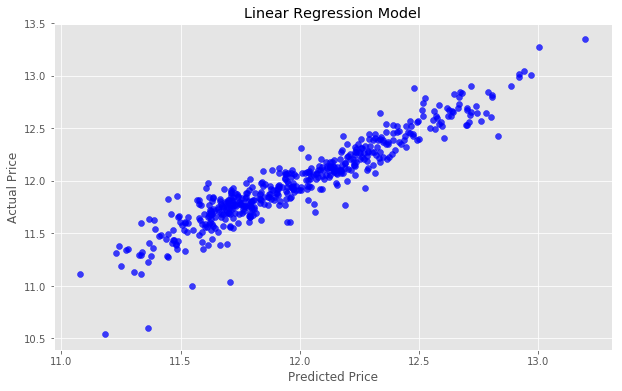

In [68]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

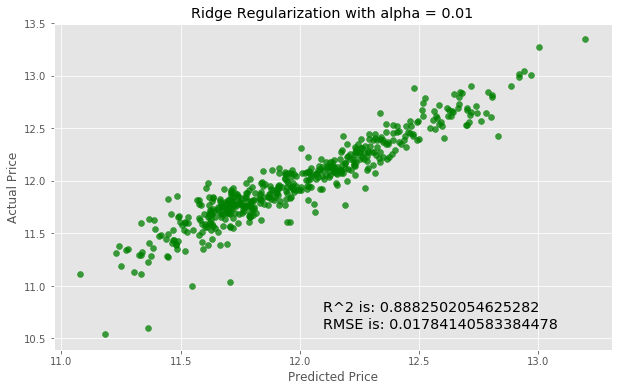

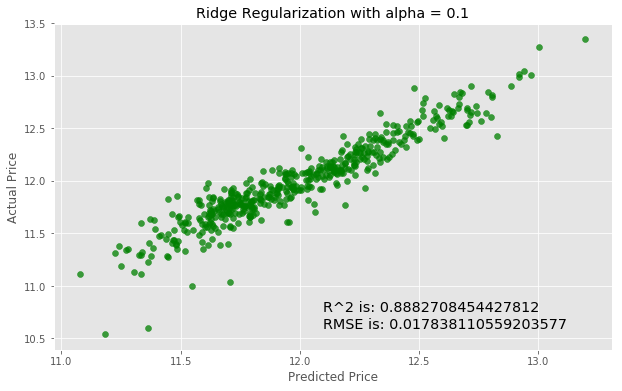

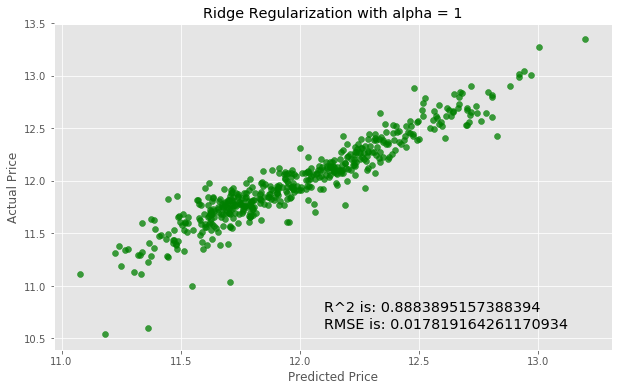

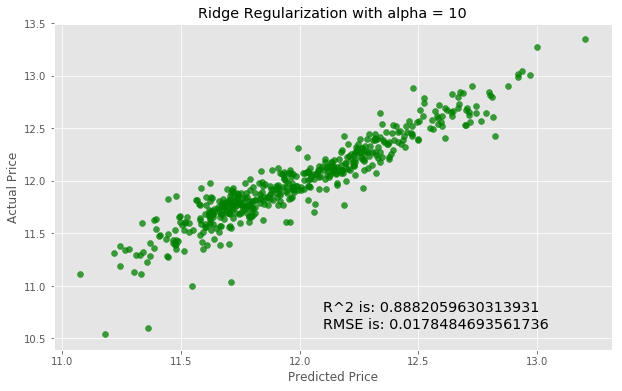

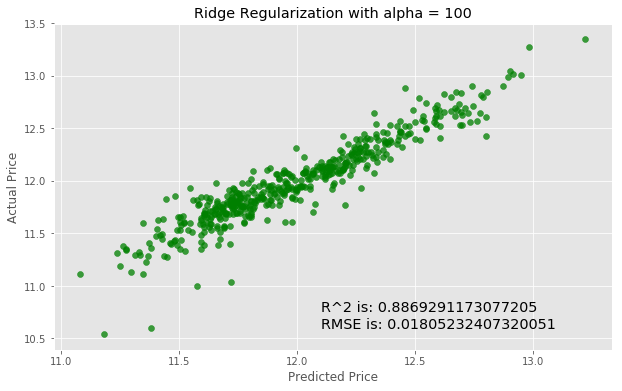

In [70]:
#Ridge regularisation
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='g')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [71]:
#For kaggle competition
submission = pd.DataFrame()
submission['Id'] = test.Id

In [72]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [74]:
feats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,120,0,0,6,2010,1.0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,36,0,0,0,0,12500,6,2010,1.0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,34,0,0,0,0,0,3,2010,1.0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,36,0,0,0,0,0,6,2010,1.0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,82,0,0,144,0,0,1,2010,1.0,0
5,60,75.0,10000,6,5,1993,1994,0.0,0.0,0.0,...,84,0,0,0,0,0,4,2010,1.0,0
6,20,69.0,7980,6,7,1992,2007,0.0,935.0,0.0,...,21,0,0,0,0,500,3,2010,1.0,0
7,60,63.0,8402,6,5,1998,1998,0.0,0.0,0.0,...,75,0,0,0,0,0,5,2010,1.0,0
8,20,85.0,10176,7,5,1990,1990,0.0,637.0,0.0,...,0,0,0,0,0,0,2,2010,1.0,0
9,20,70.0,8400,4,5,1970,1970,0.0,804.0,78.0,...,0,0,0,0,0,0,4,2010,1.0,0


In [75]:
predictions = model.predict(feats)

In [ ]:
#Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp(). So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.



In [76]:
final_predictions = np.exp(predictions)

In [77]:
final_predictions

array([ 128959.49172586,  122920.74024361,  175704.82598102, ...,
        184435.36303922,  109901.82646548,  240479.31996393])

In [80]:
print ("Original predictions are: \n", (predictions)[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])
print ("Actual values are : \n" , test.)

Original predictions are: 
 [ 11.76725362  11.71929504  12.07656074  12.20632678  12.11217655] 

Final predictions are: 
 [ 128959.49172586  122920.74024361  175704.82598102  200050.83263755
  182075.46986404]


In [82]:
#test

In [83]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [84]:
submission.to_csv('submission1.csv', index=False)